# Prelecture

## Question 1

In [1]:
# Monte Hall Simulation Code -- not the only way to code this, but it's what Prof. Schwartz came up with...

import numpy as np
all_door_options = (1,2,3)  # tuple of doors
my_door_choice = 1  # Initially choose door 1
i_won = 0 # Counter to track the number of times you win
reps = 100000 # Number of simulations
for i in range(reps):
    # For each repetition, a winning door is randomly chosen
    secret_winning_door = np.random.choice(all_door_options)
    # Convert the list of door options to a mutable list
    all_door_options_list = list(all_door_options)
    # take the secret_winning_door, so we don't show it as a "goat" losing door
    all_door_options_list.remove(secret_winning_door)
    # The try block removes the initial door choice unless it is the winning door 
    try:
        # if my_door_choice was secret_winning_door then it's already removed
        all_door_options_list.remove(my_door_choice)
    except:
        pass
    # show a "goat" losing door and remove it
    goat_door_reveal = np.random.choice(all_door_options_list)
    all_door_options_list.remove(goat_door_reveal)

    # put the secret_winning_door back in if it wasn't our choice
    # we previously removed it, so it would be shown as a  "goat" losing door
    if secret_winning_door != my_door_choice:
        all_door_options_list.append(secret_winning_door)
    # if secret_winning_door was our choice then all that's left in the list is a "goat" losing door
    # if secret_winning_door wasn't our choice then it's all that will be left in the list

    # swap strategy
    my_door_choice = all_door_options_list[0]

    if my_door_choice == secret_winning_door:
        i_won += 1

i_won/reps

0.66454

## Question 2

In [3]:
import numpy as np

# Define parameters
all_doors = [1, 2, 3] 
reps = 100000 
wins = 0 

# Simulation loop
for _ in range(reps):
    # Randomly assign the winning door
    winning_door = np.random.choice(all_doors)
    
    # Player's initial choice (fixed as door 1)
    player_choice = 1
    
    # Monty reveals a goat door (not the winning door or player's choice)
    remaining_doors = [door for door in all_doors if door != player_choice and door != winning_door]
    monty_reveals = np.random.choice(remaining_doors)
    
    # Player switches to the remaining unopened door
    switch_choice = [door for door in all_doors if door != player_choice and door != monty_reveals][0]
    
    # Check if switching wins
    if switch_choice == winning_door:
        wins += 1

# Calculate win rate
win_rate = wins / reps
win_rate

0.66672

The above code was a simpler version of the Monte Hall problem provided by ChatGPT. It easier to read and explain since it avoided the repetiton of removing and adding doors as well as make the code flow follows a natural progression from choosing a door, revealing a losing door, switching, and checking the result.

## Question 3

In [16]:
import numpy as np

# Define parameters
all_doors = [1, 2, 3] # List of doors
reps = 100000 # Number of repetitions
wins = 0 # Counter to track the number of times you win

# Simulation loop
for _ in range(reps):
    # Randomly assign the winning door
    winning_door = np.random.choice(all_doors)
    
    # Player's initial choice (fixed as door 1)
    player_choice = 1
    
    # Monty reveals a goat door (not the winning door or player's choice)
    remaining_doors = [door for door in all_doors if door != player_choice and door != winning_door]
    monty_reveals = np.random.choice(remaining_doors)
    
    # Player switches to the remaining unopened door
    switch_choice = [door for door in all_doors if door != player_choice and door != monty_reveals][0]
    
    # Check if switching wins
    if switch_choice == winning_door:
        wins += 1

# Calculate win rate by dividing number of repetition 
win_rate = wins / reps
win_rate

0.66645

## Summary of Interactions for Q1-Q3:

Transcript Log: https://chatgpt.com/share/66e5e5c9-df1c-8012-b8cd-654c40428be2

1. **Monty Hall Simulation Code Review:**
   - You provided a Python code simulating the Monty Hall problem, with 100,000 repetitions of a "switching" strategy to estimate the probability of winning.
   - I explained the code step-by-step:
     - The player initially chooses door 1.
     - The winning door is randomly selected.
     - Monty (the host) reveals a goat behind one of the remaining doors.
     - The player then switches to the remaining unopened door.
     - The number of wins when using the "switch" strategy is tracked, and the win rate is calculated as the ratio of wins to total repetitions. The expected result is close to a 2/3 chance of winning when switching.

2. **Streamlined Version of the Monty Hall Simulation:**
   - You requested an improved version of the simulation that is easier to explain and understand.
   - I provided a simplified version of the for-loop simulation, using:
     - A fixed initial door choice (door 1).
     - List comprehensions to handle door selections and Monty’s reveal.
     - A clearer flow, reducing redundant steps and unnecessary removals or re-additions of doors.
   - The streamlined version makes the code shorter and more readable, with clear steps for selecting the doors, revealing the goat, switching doors, and tracking the wins.


## Question 4

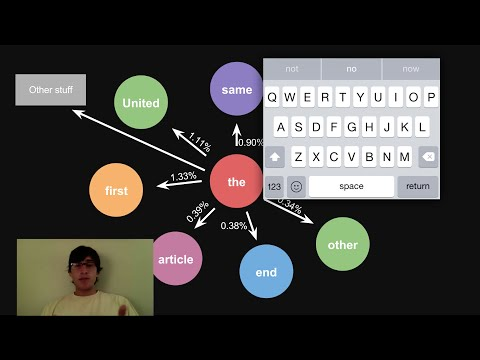

In [4]:
# Markov Chains and Text Generation
from IPython.display import YouTubeVideo
YouTubeVideo('56mGTszb_iM', width = 550)

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-11/avatar.csv"
avatar = pd.read_csv(url) #avatar.isnull().sum() #avatar[avatar.isnull().sum(axis=1)>0]
words = ("\n"+avatar.character.str.upper().replace(' ','.')+": "+avatar.full_text+" ").sum().split(' ')

In [5]:
# Markovian Chatbot

# from collections import defaultdict
word_used = dict() # defaultdict(int)
next_word = dict() # defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-1]):

    if word in word_used:
        word_used[word] += 1
    else:
        word_used[word] = 1
        next_word[word] = {}

    if words[i+1] in next_word[word]:
        next_word[word][words[i+1]] += 1
    else:
        next_word[word][words[i+1]] = 1

In [6]:
word_used

{'\nKATARA:': 1437,
 'Water.': 3,
 'Earth.': 5,
 'Fire.': 6,
 'Air.': 3,
 'My': 143,
 'grandmother': 5,
 'used': 63,
 'to': 12764,
 'tell': 129,
 'me': 469,
 'stories': 13,
 'about': 439,
 'the': 18112,
 'old': 120,
 'days:': 1,
 'a': 7911,
 'time': 194,
 'of': 7711,
 'peace': 9,
 'when': 325,
 'Avatar': 410,
 'kept': 5,
 'balance': 25,
 'between': 111,
 'Water': 139,
 'Tribes,': 1,
 'Earth': 193,
 'Kingdom,': 7,
 'Fire': 753,
 'Nation': 368,
 'and': 8400,
 'Air': 70,
 'Nomads.': 4,
 'But': 334,
 'that': 1168,
 'all': 592,
 'changed': 18,
 'attacked.': 4,
 'Only': 26,
 'mastered': 11,
 'four': 94,
 'elements;': 1,
 'only': 244,
 'he': 1572,
 'could': 226,
 'stop': 140,
 'ruthless': 3,
 'firebenders.': 10,
 'world': 63,
 'needed': 15,
 'him': 976,
 'most,': 2,
 'vanished.': 3,
 'A': 399,
 'hundred': 60,
 'years': 78,
 'have': 802,
 'passed,': 4,
 'is': 2821,
 'nearing': 4,
 'victory': 6,
 'in': 3892,
 'war.': 20,
 'Two': 49,
 'ago,': 14,
 'my': 737,
 'father': 61,
 'men': 53,
 'tribe': 

In [7]:
next_word

{'\nKATARA:': {'Water.': 2,
  '[Happily': 1,
  '[Struggling': 2,
  '[Exclaims': 1,
  '[Cut': 13,
  'Watch': 1,
  '[A': 3,
  '[Indignantly.]': 1,
  'You': 34,
  'Ever': 1,
  '[Close-up': 8,
  'No': 8,
  '[Astonished.]': 1,
  "He's": 5,
  '[Waves': 2,
  'What?': 7,
  '[Curiously.]': 4,
  '[Awkwardly.]': 2,
  '[Pushes': 1,
  '[Gasps': 1,
  "We'd": 2,
  '[While': 2,
  '[Uncomfortably.]': 1,
  'Hey.': 2,
  'I': 76,
  'Okay.': 2,
  'Aang?': 4,
  'Aang,': 39,
  '[Gesturing.]': 1,
  '[Offering': 1,
  '[Nervously.]': 5,
  '[Excitedly.]': 11,
  'But': 18,
  '[Runs': 1,
  '[Amused.]': 3,
  '[Sadly.]': 4,
  'Maybe,': 1,
  '[Unsure.]': 2,
  '[Mockingly': 2,
  '[Happily.]': 2,
  '[On': 1,
  '[Her': 1,
  'Think': 2,
  '[Squats': 1,
  '[Smiling': 3,
  'Aaah!': 1,
  '[Protesting.]': 1,
  '[Irritably,': 1,
  '[Angrily.]': 17,
  '[Pleading.]': 3,
  '[Outraged.]': 1,
  '[Upset.]': 2,
  '[Still': 4,
  '[Rounding': 1,
  '[Hysterically.]': 1,
  '[Surprised.]': 10,
  '[Sokka': 2,
  '[Making': 1,
  '[Running':

- The word_used dictionary keeps track of how many times each word appears.
- The next_word dictionary tracks which word follows each word and how often. It's a dictionary of dictionaries, where each key (word) maps to another dictionary of the words that follow and the counts of those transitions.

By iterating over the words, the model records each word’s frequency in word_used and the frequency of word transitions in next_word.

## Interaction Summary for Q4:

Transcript Log: https://chatgpt.com/share/66e5eebb-0cd0-8012-98ce-d85e7ab42348

1. **Initial Code Discussion**: You shared a Python snippet that builds a Markov Chain model to track word transitions. The code:
   - Uses two dictionaries: `word_used` to store the frequency of each word and `next_word` to store which words follow a given word and how often.
   - Iterates through a list of words (`words`) to build these statistics.

2. **Explanation of the Code**:
   - I walked through the structure and logic of your code, explaining how it functions as a first-order Markov model by counting word occurrences and their transitions.
   - I corrected and streamlined the code to ensure clarity.

3. **Sentence Generation**: 
   - I provided an example of how to generate sentences using the trained Markov Chain model.
   - The sentence generation process selects the next word probabilistically based on the transition frequencies stored in the `next_word` dictionary.

4. **Overall Summary**:
   - The conversation centered on building and understanding a Markov Chain-based chatbot. We covered how to process input words, track their transitions, and use that data to generate new sentences.


## Question5

In [9]:
# Markovian Chatbot Extension #1

from collections import Counter, defaultdict
word_used2 = defaultdict(int)
next_word2 = defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-2]):
    word_used2[word+' '+words[i+1]] += 1
    next_word2[word+' '+words[i+1]][words[i+2]] += 1 

In [10]:
word_used2

defaultdict(int,
            {'\nKATARA: Water.': 2,
             'Water. Earth.': 2,
             'Earth. Fire.': 2,
             'Fire. Air.': 2,
             'Air. My': 1,
             'My grandmother': 2,
             'grandmother used': 1,
             'used to': 40,
             'to tell': 37,
             'tell me': 32,
             'me stories': 1,
             'stories about': 3,
             'about the': 54,
             'the old': 22,
             'old days:': 1,
             'days: a': 1,
             'a time': 3,
             'time of': 2,
             'of peace': 4,
             'peace when': 1,
             'when the': 39,
             'the Avatar': 177,
             'Avatar kept': 1,
             'kept balance': 1,
             'balance between': 1,
             'between the': 33,
             'the Water': 36,
             'Water Tribes,': 1,
             'Tribes, Earth': 1,
             'Earth Kingdom,': 7,
             'Kingdom, Fire': 1,
             'Fire Nation': 3

In [11]:
next_word2

defaultdict(<function __main__.<lambda>()>,
            {'\nKATARA: Water.': defaultdict(int, {'Earth.': 2}),
             'Water. Earth.': defaultdict(int, {'Fire.': 2}),
             'Earth. Fire.': defaultdict(int, {'Air.': 2}),
             'Fire. Air.': defaultdict(int, {'My': 1, 'Long': 1}),
             'Air. My': defaultdict(int, {'grandmother': 1}),
             'My grandmother': defaultdict(int, {'used': 1, 'gave': 1}),
             'grandmother used': defaultdict(int, {'to': 1}),
             'used to': defaultdict(int,
                         {'tell': 2,
                          'be': 7,
                          'always': 2,
                          'kind': 1,
                          'be.]': 1,
                          'hang': 1,
                          'have': 1,
                          'come': 4,
                          'be.': 4,
                          'calling': 1,
                          'contain': 1,
                          'show': 1,
              

In [12]:
# Markovian Chatbot Extension #2

from collections import Counter, defaultdict
# `avatar` is a dataset, and `character` is one of it's columns
characters = Counter("\n"+ avatar.character.str.upper().str.replace(' ','.')+":")
# this code changes the type of the `character` column to `str`; then,
# makes the text uppercase, and replaces spaces with '.'

nested_dict = lambda: defaultdict(nested_dict)
word_used2C = nested_dict()
next_word2C = nested_dict()

for i,word in enumerate(words[:-2]):
    if word in characters:
        character = word
        
    if character not in word_used2C:
        word_used2C[character] = dict()
    if word+' '+words[i+1] not in word_used2C[character]:
        word_used2C[character][word+' '+words[i+1]] = 0
    word_used2C[character][word+' '+words[i+1]] += 1
    
    if character not in next_word2C:
        next_word2C[character] = dict()
    if word+' '+words[i+1] not in next_word2C[character]:
        next_word2C[character][word+' '+words[i+1]] = dict()
    if words[i+2] not in next_word2C[character][word+' '+words[i+1]]:
        next_word2C[character][word+' '+words[i+1]][words[i+2]] = 0
    next_word2C[character][word+' '+words[i+1]][words[i+2]] += 1

In [13]:
characters

Counter({'\nSCENE.DESCRIPTION:': 3393,
         '\nAANG:': 1796,
         '\nSOKKA:': 1639,
         '\nKATARA:': 1437,
         '\nZUKO:': 776,
         '\nTOPH:': 507,
         '\nIROH:': 337,
         '\nAZULA:': 211,
         '\nJET:': 134,
         '\nSUKI:': 114,
         '\nZHAO:': 107,
         '\nMAI:': 82,
         '\nHAKODA:': 77,
         '\nROKU:': 67,
         '\nTY.LEE:': 64,
         '\nOZAI:': 59,
         '\nBUMI:': 55,
         '\nYUE:': 53,
         '\nWARDEN:': 49,
         '\nHAMA:': 49,
         '\nLONG.FENG:': 46,
         '\nPIANDAO:': 43,
         '\nMECHANIST:': 42,
         '\nKUEI:': 40,
         '\nBATO:': 38,
         '\nPATHIK:': 38,
         '\nPAKKU:': 37,
         '\nTEO:': 35,
         '\nYOUNG.ZUKO:': 33,
         '\nCHONG:': 33,
         '\nJEONG.JEONG:': 32,
         '\nGUARD:': 31,
         '\nHARU:': 29,
         '\nJOO.DEE:': 29,
         '\nZHANG.LEADER:': 28,
         '\nWU:': 28,
         '\nJUNE:': 28,
         '\nXIN.FU:': 27,
         '\n

In [14]:
word_used2C

defaultdict(<function __main__.<lambda>()>,
            {'\nKATARA:': {'\nKATARA: Water.': 2,
              'Water. Earth.': 2,
              'Earth. Fire.': 2,
              'Fire. Air.': 2,
              'Air. My': 1,
              'My grandmother': 2,
              'grandmother used': 1,
              'used to': 5,
              'to tell': 4,
              'tell me': 6,
              'me stories': 1,
              'stories about': 1,
              'about the': 9,
              'the old': 4,
              'old days:': 1,
              'days: a': 1,
              'a time': 1,
              'time of': 1,
              'of peace': 1,
              'peace when': 1,
              'when the': 10,
              'the Avatar': 11,
              'Avatar kept': 1,
              'kept balance': 1,
              'balance between': 1,
              'between the': 6,
              'the Water': 5,
              'Water Tribes,': 1,
              'Tribes, Earth': 1,
              'Earth Kingdom,': 3,


In [15]:
next_word2C

defaultdict(<function __main__.<lambda>()>,
            {'\nKATARA:': {'\nKATARA: Water.': {'Earth.': 2},
              'Water. Earth.': {'Fire.': 2},
              'Earth. Fire.': {'Air.': 2},
              'Fire. Air.': {'My': 1, 'Long': 1},
              'Air. My': {'grandmother': 1},
              'My grandmother': {'used': 1, 'gave': 1},
              'grandmother used': {'to': 1},
              'used to': {'tell': 1,
               'be.]': 1,
               'come': 1,
               'each': 1,
               'be.': 1},
              'to tell': {'me': 2, 'you,': 1, 'the': 1},
              'tell me': {'stories': 1,
               'we': 1,
               'something': 1,
               'about': 1,
               'no!': 1,
               'you': 1},
              'me stories': {'about': 1},
              'stories about': {'the': 1},
              'about the': {'old': 1,
               'airbenders.': 1,
               'challenges.': 1,
               'wait,': 1,
               'air.': 

### Extension #1:
ChatGPT seems to understand it very well that this extension allows the Markov Chain model to predict the next word based on two previous words. The word_used2 variable now stores the frequency of word pairs (word + words[i+1]) rather than individual words, and the variable next_word2 tracks which word follows a pair of consecutive words instead of just a single word.

### Extension #2:
ChatGPT seems to understand this extension as well by telling me that this extension creates a character-based Markov Chain where the transitions between words are tracked individually for each character by using the variable characters to hold the frequency of each character, after converting the character column of the dataset (avatar.character) to uppercase and replacing spaces with dots (.), variables word_used2C and next_word2C to store word pair frequencies and transitions for each character individually. Also, when I ask ChatGPT to explain the code line by line, it gives a fairly accurate and clear explanation. 

## Summary of Interaction for Q5.1 & Q5.2

Transcript Log: https://chatgpt.com/share/66e5eebb-0cd0-8012-98ce-d85e7ab42348 (See the section after the first conversation)

1. **Markovian Chatbot Extensions**:  
   You provided two **extensions** to the original Markov Chain chatbot code:
   
   - **Extension 1**:  
     This version extended the original model by tracking **word pairs** instead of individual words, making it a **second-order Markov Chain**. The code counted occurrences of word pairs and the words that follow those pairs. 
   
   - **Extension 2**:  
     In this extension, the model is made **character-based**. It processes text from a dataset (referred to as `avatar.character`) and tracks word transitions **separately for each character**. The code creates character-specific word-pair statistics using nested dictionaries.

2. **Line-by-Line Code Explanation for Extension 2**:
   - We walked through the second extension line-by-line, explaining how it:
     - Handles dataset input and processes characters.
     - Uses `defaultdict` to build dynamic, nested data structures.
     - Tracks word pair transitions based on which character is speaking.
     - Generates character-specific second-order Markov Chains to capture each character’s unique speech pattern.

3. **Handling Undefined `character` Variable**:
   - You pointed out that if a word is not found in the `characters` list, the `character` variable might not be defined. I provided a solution by initializing `character` as `None` and modifying the loop to ensure valid word transitions only occur when a valid character is set.
   - I also gave an alternative solution where `character` is reset to `None` whenever a non-character word is encountered, offering more control over the character detection process.


### 5.3
ChatGPT is able to comprehend the code from extension #2 without any extra support. It gives a clear explanation to how the code extracts characters from the dataset and builds a bigram-based language model for each character in the dataset. 

## Summary of Interaction for Q5.3

Transcript Log: https://chatgpt.com/share/66e8b421-b728-8012-a7d7-e52031570898

1. **Markovian Chatbot Code Explanation**:
   - You shared a Markovian chatbot code that tracks word transitions using dictionaries (`word_used` and `next_word`). The code loops through a list of words and counts how often one word follows another. I explained that this is the basis of a Markov model and suggested using `defaultdict` from Python's `collections` module to simplify the dictionary initialization process. I also provided a sample implementation using a text corpus for demonstration.

2. **Extended Markovian Chatbot Code**:
   - You shared an extension of the Markovian chatbot code that tracks bigrams (pairs of consecutive words) and handles dialogue from different characters in a dataset (`avatar`). This extension introduced two nested dictionaries: `word_used2C` (which tracks bigram counts per character) and `next_word2C` (which tracks word transitions from bigrams for each character).
   - I explained the purpose of this extended code, highlighting how it tracks bigrams and their transitions for different characters, enabling more contextual and character-specific predictions. I also walked through the major changes, such as the addition of bigram tracking and how character-specific transitions are modeled.

3. **Detailed Explanation of the Code Extension**:
   - I provided an in-depth breakdown of the code extension, explaining how it processes characters, tracks bigrams for each character, and stores word transitions. This enables the chatbot to predict what word might come next based on the character's speaking style. I clarified the purpose of `nested_dict`, how bigram and word transitions are tracked, and how this structure allows for more accurate and character-specific responses.


## Question 6

### 6.1
I think ChatGPT is really helpful as a tool to help me understand both the Monte Hall problem and the Markovian Chatbot code. For both codes, ChatGPT could understand immediately and give a clear, well-formatted explanation. 

For example, when I asked him to explain the function of extension #2, he first gave me a brief explanation of the overall function of the code, then he started dissect the code and explain stuff almost line by line. Finally, he gave me a summary of everything that he just covered. 

### 6.2
Most of the time, ChatGPT did a really good job in explaining things, especially on coding-related stuff; it clearly explains everything almost line by line, but sometimes when it comes to revising errors that occurred in the code, it often spits out some code that has some other errors in it, and when you ask him again to fix these new errors, it spits out code that contains other errors again, and sometimes it gets really frustrating when it comes to fixing these errors. 

### 6.3
For most of the questions that I asked ChatGPT, it gave me a precise and well-formatted explanation except for a few times it made mistakes in its code, which is a disappointment. 

So, overall, I give ChatGPT an 8/10. 

## Question 7
Since this is not the first time I used the generative AI for assignments, initially I did not think that using AI for assignments would be much different from what I did back in high school. However, this course by far has taught me how AI generates sentences based on the collection of data that it gathers, and more importantly, I learned how flexible the AI can be. 

For example, in the past I usually only asked the AI once for a question, and if it's solution is not valid, then I would give up on using it. Now I learned that if the AI did not answer something correctly, I can keep guiding it so that eventually it gives me what I wanted. (Although sometimes this process is very frustrating.) 

Therefore, I will say my perception towards AI as an assistance tool has changed a lot since joining the course, and I am more comfortable with using AI as a guide for my questions. 

## Question 8

## Summary of Interaction for Q8.1 & Q8.2

Transcript Log: https://chatgpt.com/share/66e8e7bc-5738-8012-a941-27d318c36e9f

1. **Career in Data Science and Related Skills**:
   - We discussed the importance of **learning and adaptability**, **communication**, **coding**, and **statistics and data analysis** in modern careers, especially in the context of data science. These skills are key in navigating the fast-evolving tech industry and remaining competitive.
   
2. **Current Trends in Data Science**:
   - We explored current trends in the data science industry, including **automation and AI**, **real-time analytics**, **federated learning**, **data democratization**, and increasing focus on **data privacy and security**. Skills in big data, machine learning, and cloud-based tools are becoming increasingly valuable【12†source】.

3. **Becoming a Statistician or Data Scientist**:
   - I clarified that while it's possible to work in adjacent roles like **data strategy** or **project management**, the core functions of a **statistician** or **data scientist** typically require some coding and data analysis. Hands-on experience in these areas is critical for success.

4. **Video Game Design Career**:
   - You expressed interest in becoming a **video game designer**, and we covered essential skills, such as **game mechanics design**, **programming**, **storytelling**, **3D modeling**, **collaboration**, and **user experience design**. These skills combine both creative and technical aspects, necessary for creating engaging game worlds.

5. **University Programs for Game Design**:
   - I recommended several university programs that align with your goal of becoming a game designer, including **Game Design and Development**, **Computer Science (Game Development focus)**, **Interactive Media**, and **Animation**. You can tailor your education to focus on either the creative or technical aspects, depending on your preferences.


### 8.4
I want to become a video game designer in the future. Unfortunately, I am not a first year computer science student, so the most important thing I need to accomplish now is to enrol in computer science major program for my second year. After that, if I successfully transferred to CS major, I will put my focus in video game design and start to get deeper in skills such as programming, game mechanics design, and 3D modeling. 

### 8.5
I think ChatGPT is able to provide some really good points that I will consider. However, it's response is too general. 

For example, obviously I know that if I want to be a video game designer, I will have enrol in CS program and learn graphic design and 3D modeling etc. I want to know how can I achieve this since enrol in Computer Science program from out stream is really difficult. Perhaps the next step I would take is to tell ChatGPT my situation and hopefully it gives me some helpful suggestions. 

## Question 9 
# YES